# IBM Machine Learning

## Final Project

### Preparation

Installing some items that may be needed

In [45]:
%pip install numpy
%pip install pandas
%pip install scikit-learn==1.2.2
%pip install matplotlib
%pip install seaborn
%pip install graphviz
%sudo port install viz
%pip install mlxtend
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%sudo` not found.


Now we can legally import the files without any issues

### Data Retrieval

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from io import StringIO
import pydotplus
import graphviz

# Let's also begin by importing our data
data = pd.read_csv("churndata_processed.csv")
data.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


The asset, as taken from the official IBM course, is already preprocessed. 
However, we should check what features cause the most influece.

In [47]:
print(sorted(data))

['backup', 'churn_value', 'contract', 'gb_mon', 'internet_type_DSL', 'internet_type_Fiber Optic', 'internet_type_None', 'monthly', 'months', 'multiple', 'offer_Offer A', 'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E', 'paperless', 'payment_Credit Card', 'payment_Mailed Check', 'protection', 'satisfaction', 'security', 'support', 'unlimited']


So we are looking for churn value

### ML Analysis

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.433551,0.398231,0.0,0.000000,0.250000,0.750000,1.0
multiple,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
gb_mon,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
security,7043.0,0.286668,0.452237,0.0,0.000000,0.000000,1.000000,1.0
backup,7043.0,0.344881,0.475363,0.0,0.000000,0.000000,1.000000,1.0
protection,7043.0,0.343888,0.475038,0.0,0.000000,0.000000,1.000000,1.0
support,7043.0,0.290217,0.453895,0.0,0.000000,0.000000,1.000000,1.0
unlimited,7043.0,0.673719,0.468885,0.0,0.000000,1.000000,1.000000,1.0
contract,7043.0,0.377396,0.424234,0.0,0.000000,0.000000,1.000000,1.0
paperless,7043.0,0.592219,0.491457,0.0,0.000000,1.000000,1.000000,1.0


In [49]:
data

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.00,0,0.000000,0,0,0,0,0,1.0,1,...,0,0,0,0,1,0,0,0,0,0
7039,0.25,1,0.282353,1,0,1,1,1,0.5,1,...,0,1,0,0,0,0,0,1,0,0
7040,1.00,1,0.694118,0,1,1,0,1,0.5,1,...,1,0,0,1,0,0,0,0,0,0
7041,0.00,0,0.200000,1,0,0,0,1,0.0,1,...,0,0,1,0,0,0,0,0,0,0


In [50]:
data.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
payment_Credit Card            int64
payment_Mailed Check           int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
dtype: object

In [51]:
Corrdata = data.corrwith(data["churn_value"]).abs().reset_index()

In [52]:
Corrdata.rename(columns = {0: "Correlation"}, inplace = True)
Corrdata.columns
Corrdata.sort_values(by = ["Correlation"], ascending = False)

,index,Correlation
12,churn_value,1.000000
11,satisfaction,0.754649
8,contract,0.435398
0,months,0.337205
16,internet_type_Fiber Optic,0.279623
17,internet_type_None,0.227890
13,payment_Credit Card,0.218528
22,offer_Offer E,0.214648
10,monthly,0.193356
9,paperless,0.191825


Text(0.5, 1.0, 'Absolute Correlation to Churn Value')

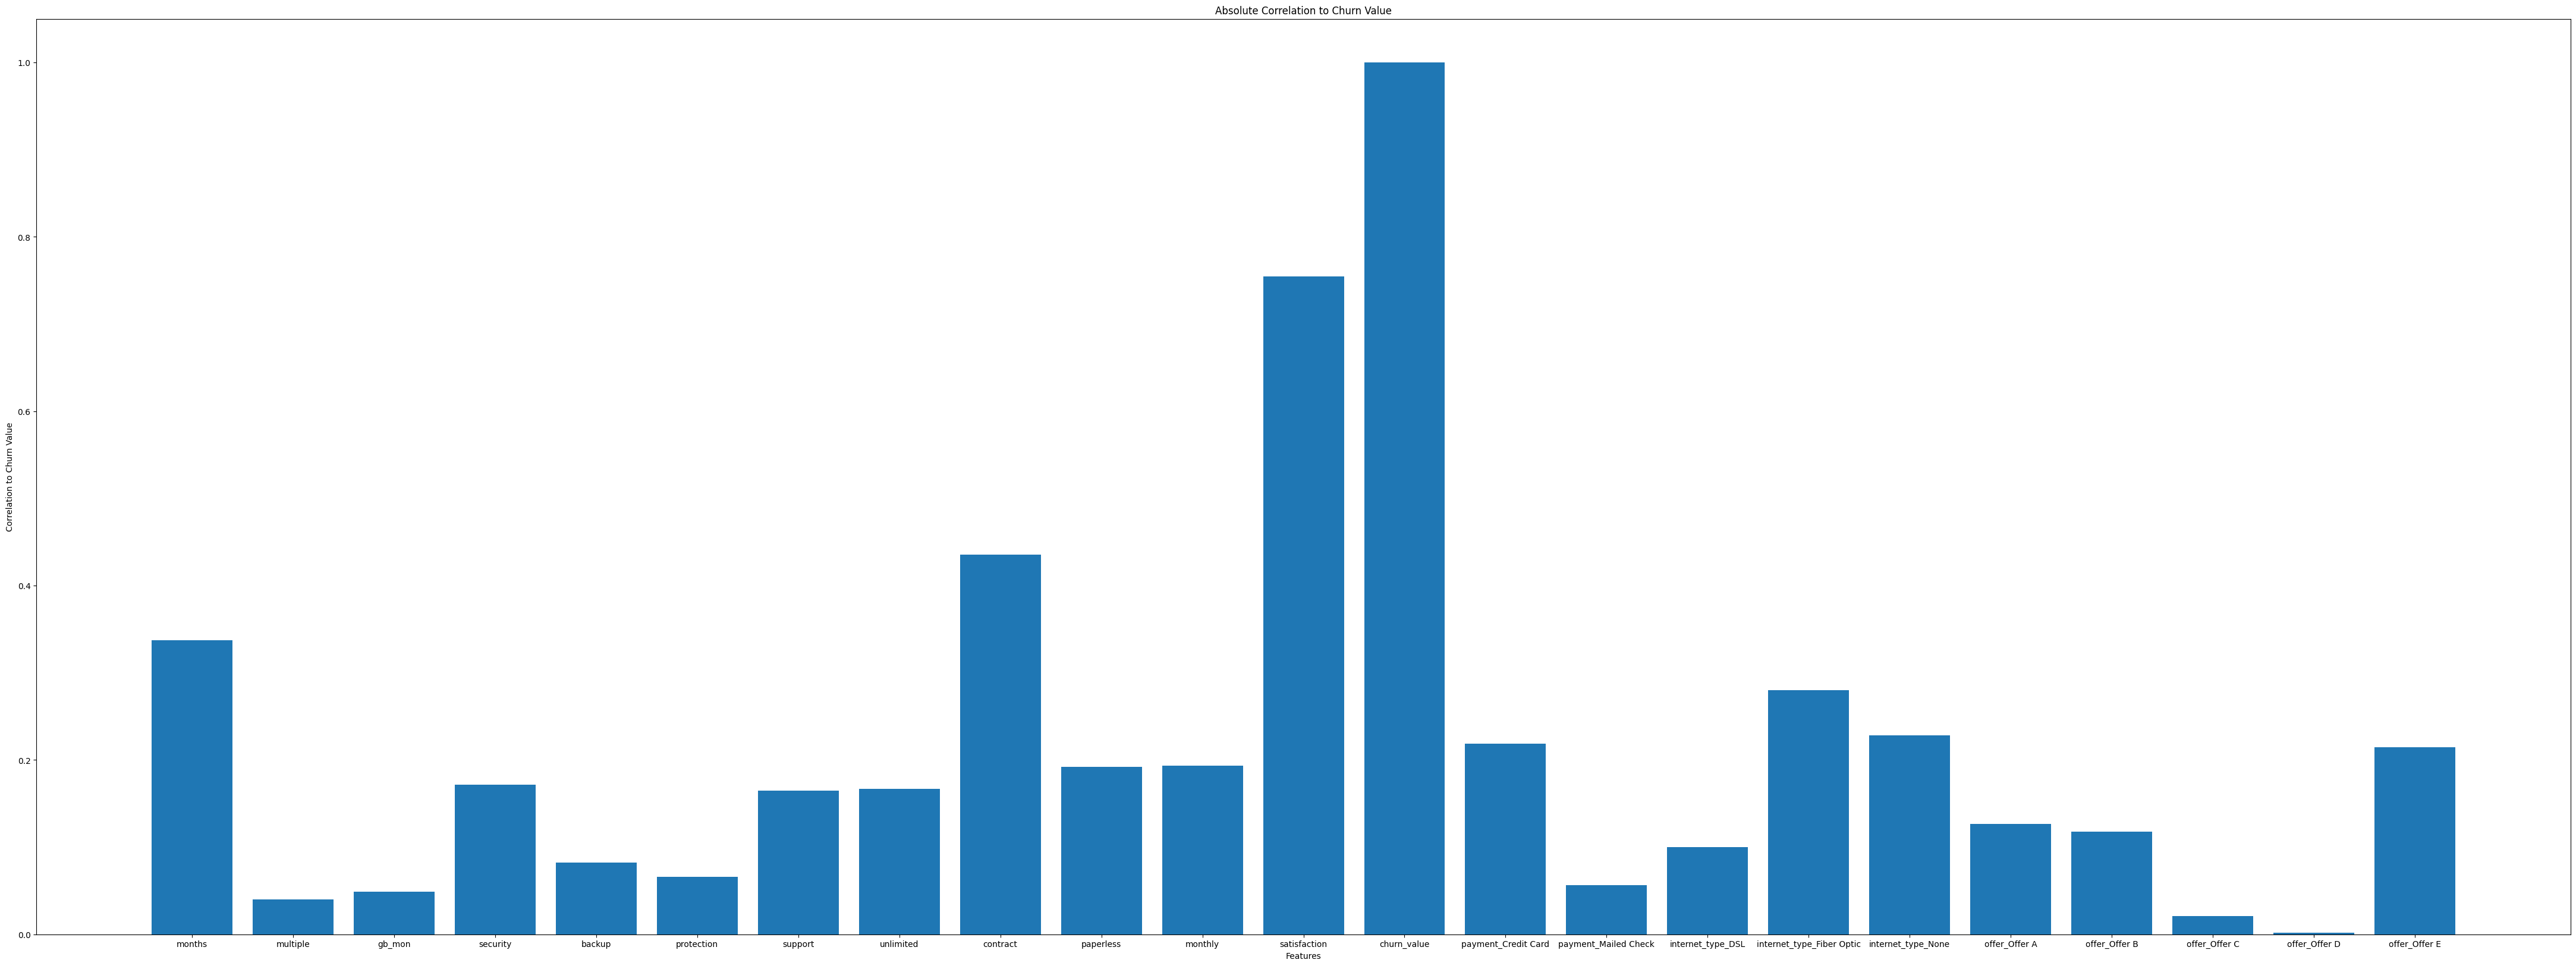

In [53]:
ourfig = plt.figure(figsize = (55,20))

plt.bar(data = Corrdata, x = "index", height = "Correlation")
plt.xlabel("Features")
plt.ylabel("Correlation to Churn Value")
plt.title("Absolute Correlation to Churn Value")

Based on what we found, customer plan satisfaction is unsurprisingly the greatest driving factor on customer churn rate, but we will also include other factors, like months, and Internet Type.

In [54]:
ydata = data["churn_value"].reset_index()
xdata = data[["satisfaction","months", "internet_type_Fiber Optic", "internet_type_DSL", "internet_type_None"]]

ydata.drop(columns = ["index"], inplace = True)

ydata

,churn_value
0,1
1,1
2,1
3,1
4,1
...,...
7038,0
7039,0
7040,0
7041,0


Let's compare the variables we are working with
- People who have been using our services seem to be satisfied than those who think "oh this isn't a good idea from the beginning"
- With the reliance of the internet, the service providing such may improve satisfaction, and ultimately keep customers from churning

Text(0.5, 0.98, 'Customer Satisfaction Rates Based on Internet Service Type')

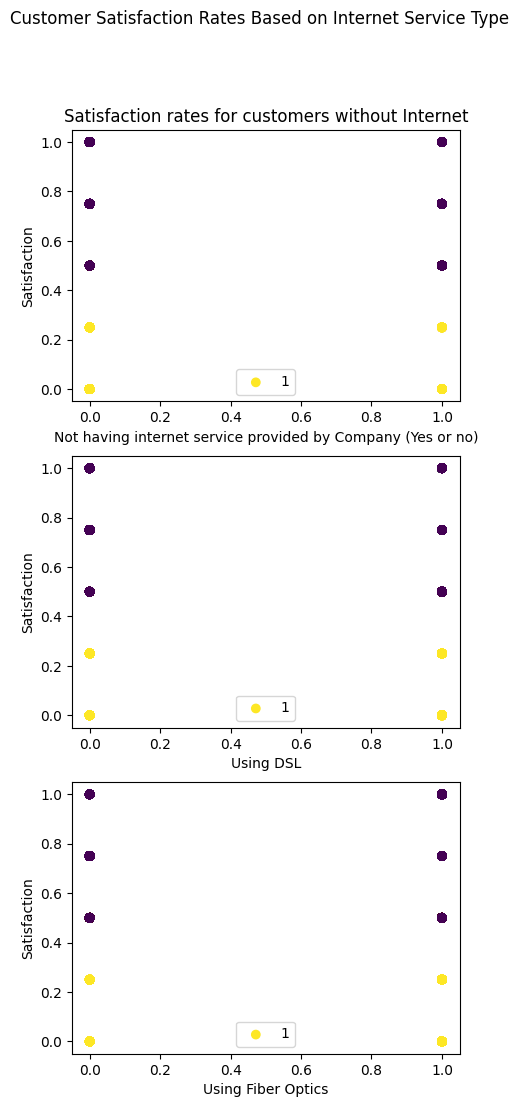

In [55]:
# Sea cannot really do much with these decimals
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (5,12))
ax1.scatter(x = xdata["internet_type_None"], y = xdata["satisfaction"], c = ydata["churn_value"])
ax1.set_title("Satisfaction rates for customers without Internet")
ax1.legend(ydata["churn_value"])
ax1.set_xlabel("Not having internet service provided by Company (Yes or no)")
ax1.set_ylabel("Satisfaction")
ax2.scatter(x = xdata["internet_type_DSL"], y = xdata["satisfaction"], c = ydata["churn_value"])
ax2.legend(ydata["churn_value"])
ax2.set_xlabel("Using DSL")
ax2.set_ylabel("Satisfaction")
ax3.scatter(x = xdata["internet_type_Fiber Optic"], y = xdata["satisfaction"], c = ydata["churn_value"])
ax3.legend(ydata["churn_value"])
ax3.set_xlabel("Using Fiber Optics")
ax3.set_ylabel("Satisfaction")
fig.suptitle("Customer Satisfaction Rates Based on Internet Service Type")

...Yeah, where the churn rates are based on the satisfaction seems to be obvious here, but what if we add months somewhere?

Text(0.5, 1.0, 'DurationvSatisfactionChurn')

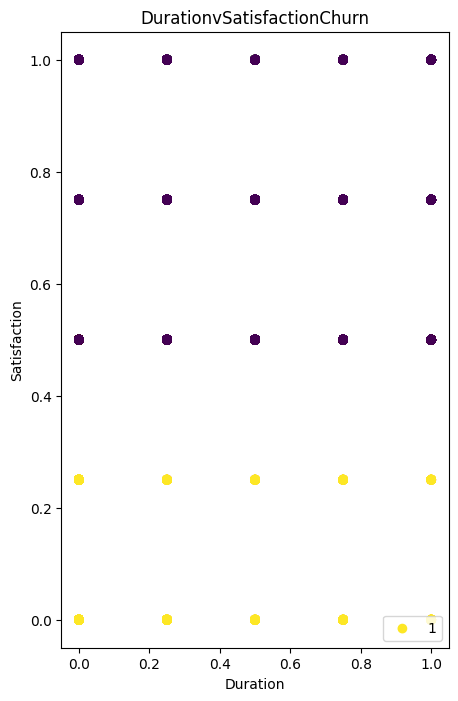

In [56]:
fig, (ax1) = plt.subplots(1,1, figsize = (5,8))
ax1.scatter(x = xdata["months"], y = xdata["satisfaction"], c = ydata["churn_value"])
ax1.legend(ydata["churn_value"])
ax1.set_xlabel("Duration")
ax1.set_ylabel("Satisfaction")
ax1.set_title("DurationvSatisfactionChurn")

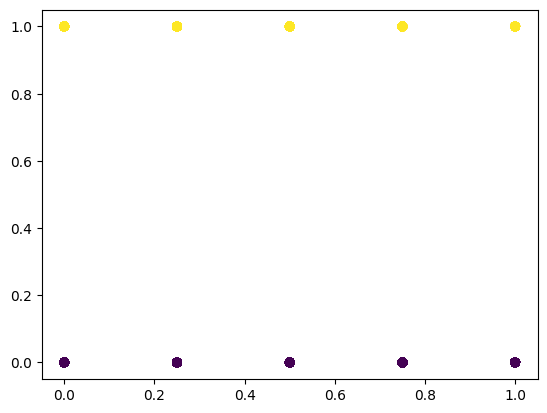

In [57]:
plt.scatter(x = xdata["months"], y = ydata["churn_value"], c = ydata["churn_value"])

With our variables separated, we can safely put them into train test splits.

In [58]:
from sklearn.model_selection import train_test_split

# All models will be using the same train_test_split

x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.8, random_state= 42)

x_train

,satisfaction,months,internet_type_Fiber Optic,internet_type_DSL,internet_type_None
1555,0.00,0.00,0,0,1
6800,0.50,0.50,1,0,0
3190,0.75,0.25,0,0,1
4566,1.00,0.25,0,0,1
4802,0.75,1.00,1,0,0
...,...,...,...,...,...
3772,0.50,0.00,0,0,1
5191,0.50,0.50,1,0,0
5226,0.75,0.25,0,1,0
5390,0.75,0.25,1,0,0


In [59]:
x_test

,satisfaction,months,internet_type_Fiber Optic,internet_type_DSL,internet_type_None
185,0.50,0.75,1,0,0
2715,0.75,0.75,0,0,1
3825,1.00,0.75,0,1,0
1807,0.00,0.00,0,0,1
132,0.00,0.00,0,0,0
...,...,...,...,...,...
6792,1.00,0.25,0,1,0
5000,1.00,0.75,0,1,0
1279,0.00,0.00,1,0,0
6281,0.50,1.00,1,0,0


The classification will utilize different models and tune them up using Grid Search.

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import sklearn.tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_decision_regions
import pprint
import pydotplus



# Here are the parameters that will be utilized
# They will be listed as dictionaries  which their keys' values are lists of items to test
linregparameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

svmparameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

treeparameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

knnparameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# Also, a dictionary that holds the models' names and cases
records = {
    "names": ["Logistic", "SVM", "Tree", "KNN"],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1": []
}

#### Lin reg

In [61]:
linlog = LogisticRegression()

lincv = GridSearchCV(estimator = linlog, param_grid = linregparameters, cv = 10)

lincv.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [62]:
# Here are its best parammies:
print(f"Here are the LogReg's best params: {lincv.best_params_}")

Here are the LogReg's best params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [63]:
# Here is its best score
print(f"Here is the best score/accuracy from the model: {lincv.best_score_}")

Here is the best score/accuracy from the model: 0.9382117527862208


In [64]:
lincv.score(x_test, y_test)

0.9357586512866016

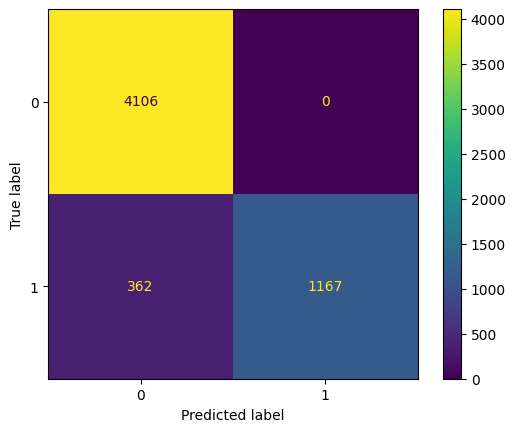

In [65]:
# Let's create the Confusion Matrix
y_hat = lincv.predict(x_test)

matrix = confusion_matrix(y_test, y_hat)

displaymatrix = ConfusionMatrixDisplay(matrix)

displaymatrix.plot()

In [66]:
records["Accuracy"].append(accuracy_score(y_test, y_hat))
records["Precision"].append(precision_score(y_test, y_hat))
records["Recall"].append(recall_score(y_test, y_hat))
records["F1"].append(f1_score(y_test, y_hat))

pprint.pprint(records)

{'Accuracy': [0.9357586512866016],
 'F1': [0.865727002967359],
 'Precision': [1.0],
 'Recall': [0.76324395029431],
 'names': ['Logistic', 'SVM', 'Tree', 'KNN']}


In [67]:
svthing = SVC()

svcv = GridSearchCV(estimator = svthing, param_grid = svmparameters, cv = 10)

svcv.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [68]:
print(f"Here are the SVM's best params: {svcv.best_params_}")

Here are the SVM's best params: {'C': 0.001, 'gamma': 31.622776601683793, 'kernel': 'poly'}


In [69]:
print(f"Here is the best score/accuracy from the model: {svcv.best_score_}")

Here is the best score/accuracy from the model: 0.9431864235055725


In [70]:
svcv.score(x_test, y_test)

0.9380656610470275

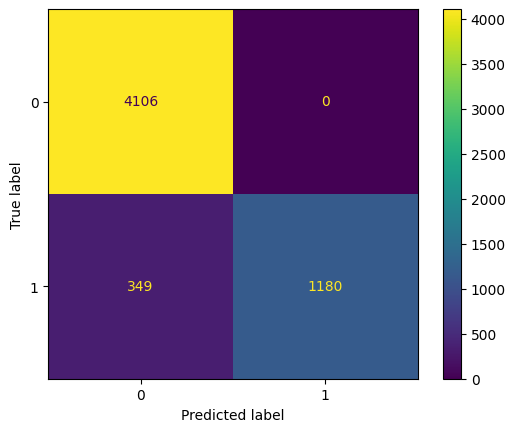

In [71]:
y_hat = svcv.predict(x_test)

matrix = confusion_matrix(y_test, y_hat)

displaymatrix = ConfusionMatrixDisplay(matrix)

displaymatrix.plot()

In [72]:
records["Accuracy"].append(accuracy_score(y_test, y_hat))
records["Precision"].append(precision_score(y_test, y_hat))
records["Recall"].append(recall_score(y_test, y_hat))
records["F1"].append(f1_score(y_test, y_hat))

pprint.pprint(records)

{'Accuracy': [0.9357586512866016, 0.9380656610470275],
 'F1': [0.865727002967359, 0.8711701734957549],
 'Precision': [1.0, 1.0],
 'Recall': [0.76324395029431, 0.7717462393721386],
 'names': ['Logistic', 'SVM', 'Tree', 'KNN']}


In [73]:
treeb = DecisionTreeClassifier()

treecv = GridSearchCV(estimator = treeb, param_grid= treeparameters, cv = 10)

treecv.fit(x_train, y_train.values.ravel())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [74]:
print(f"Here are the Tree's best params: {treecv.best_params_}")

Here are the Tree's best params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}


In [75]:
print(f"Here is the best score/accuracy from the model: {treecv.best_score_}")

Here is the best score/accuracy from the model: 0.9431864235055725


In [76]:
treecv.score(x_test, y_test)

0.901153504880213

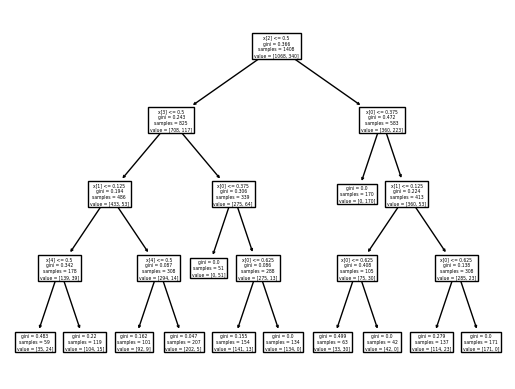

In [77]:
sklearn.tree.plot_tree(treecv.best_estimator_, max_depth = 4)

plt.show()

In [78]:
treecv.best_estimator_.tree_.node_count, treecv.best_estimator_.tree_.max_depth

(23, 4)

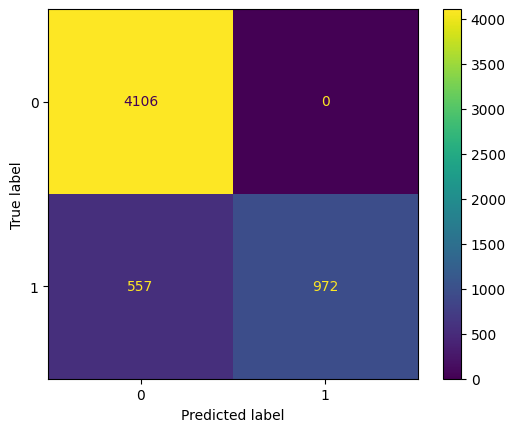

In [79]:
y_hat = treecv.predict(x_test)

matrix = confusion_matrix(y_test, y_hat)

displaymatrix = ConfusionMatrixDisplay(matrix)

displaymatrix.plot()

In [80]:
records["Accuracy"].append(accuracy_score(y_test, y_hat))
records["Precision"].append(precision_score(y_test, y_hat))
records["Recall"].append(recall_score(y_test, y_hat))
records["F1"].append(f1_score(y_test, y_hat))

pprint.pprint(records)

{'Accuracy': [0.9357586512866016, 0.9380656610470275, 0.901153504880213],
 'F1': [0.865727002967359, 0.8711701734957549, 0.7772890843662535],
 'Precision': [1.0, 1.0, 1.0],
 'Recall': [0.76324395029431, 0.7717462393721386, 0.6357096141268803],
 'names': ['Logistic', 'SVM', 'Tree', 'KNN']}


In [81]:
knnthing = KNeighborsClassifier()

Knncv = GridSearchCV(estimator = knnthing, param_grid = knnparameters, cv = 10)

Knncv.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [82]:
print(f"Here are the KNN's best params: {Knncv.best_params_}")

Here are the KNN's best params: {'algorithm': 'brute', 'n_neighbors': 1, 'p': 1}


In [83]:
print(f"Here is the best score/accuracy from the model: {Knncv.best_score_}")

Here is the best score/accuracy from the model: 0.9410536980749746


In [84]:
Knncv.score(x_test, y_test)

0.9368234250221827

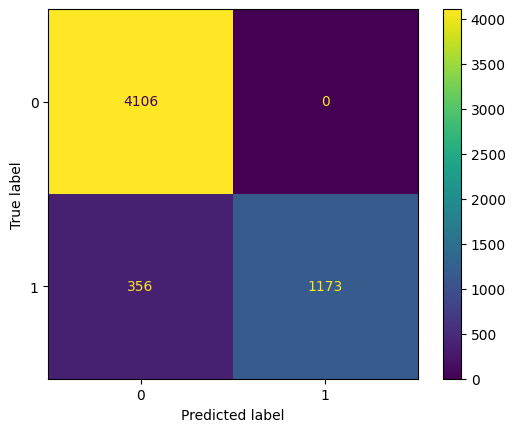

In [85]:
y_hat = Knncv.predict(x_test)

matrix = confusion_matrix(y_test, y_hat)

displaymatrix = ConfusionMatrixDisplay(matrix)

displaymatrix.plot()

In [86]:
records["Accuracy"].append(accuracy_score(y_test, y_hat))
records["Precision"].append(precision_score(y_test, y_hat))
records["Recall"].append(recall_score(y_test, y_hat))
records["F1"].append(f1_score(y_test, y_hat))

pprint.pprint(records)

{'Accuracy': [0.9357586512866016,
              0.9380656610470275,
              0.901153504880213,
              0.9368234250221827],
 'F1': [0.865727002967359,
        0.8711701734957549,
        0.7772890843662535,
        0.8682457438934122],
 'Precision': [1.0, 1.0, 1.0, 1.0],
 'Recall': [0.76324395029431,
            0.7717462393721386,
            0.6357096141268803,
            0.7671680837148463],
 'names': ['Logistic', 'SVM', 'Tree', 'KNN']}


### Model Evaluations

In [87]:
RecordDF = pd.DataFrame.from_dict(records)

RecordDF

,names,Accuracy,Precision,Recall,F1
0,Logistic,0.935759,1.0,0.763244,0.865727
1,SVM,0.938066,1.0,0.771746,0.871170
2,Tree,0.901154,1.0,0.635710,0.777289
3,KNN,0.936823,1.0,0.767168,0.868246


We have acquired all of the necessary data for comparison, we can now display their results in a series of bar charts.

Text(0.5, 1.0, 'F1 Scores')

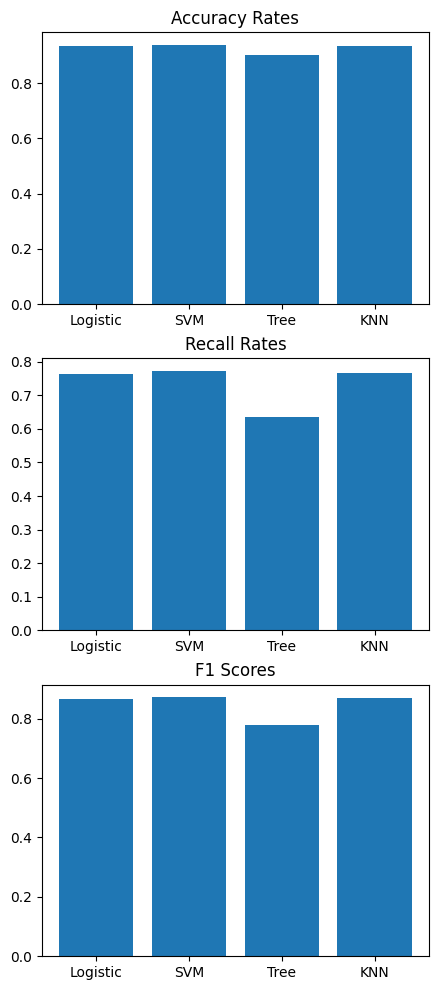

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (5,12))
ax1.bar(data = RecordDF, x = "names", height = "Accuracy")
ax1.set_title("Accuracy Rates")
ax2.bar(data = RecordDF, x = "names", height = "Recall")
ax2.set_title("Recall Rates")
ax3.bar(data = RecordDF, x = "names", height = "F1")
ax3.set_title("F1 Scores")